In [181]:
import matplotlib
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] =(12, 5)

def smooth(row, explen=None):
    if explen is None:
        N = max(int(len(row)*0.02), 1)
    else:
        N = max(int(explen*0.02), 1)
    row = np.convolve(row, np.array(np.ones((N)))/float(N), 'valid')
    return row

def plot(fields, first=None, legends=None, alpha=None, rescale_y=None, startpoints=None):
    lines = []
    for field in fields:
        for ind, (data, header) in enumerate(zip(datas, headers)):
            try:
                header.index(field)
                row = data[:, header.index(field)]
                row = smooth(row, first)[:first]
                _alpha = alpha if alpha else (0.2 if row.shape[0] == first else 1.0)
                if rescale_y:
                    row = (row-rescale_y[0])/(rescale_y[1]-rescale_y[0])*100
                if startpoints is None:
                    line, =plt.plot(range(row.shape[0]), row, alpha=_alpha)
                else:
                    line, =plt.plot(range(startpoints[ind], startpoints[ind]+row.shape[0]),
                                    row, alpha=_alpha)
                lines.append(line)
            except:
                pass
    if first is not None:
        plt.xlim(0, first)
    plt.legend(handles=lines, labels=legends if legends else filenames)  # , loc=4)

def readfile(filename):
    with open(filename) as f:
        #data = map(lambda x: x.strip().split(','), f.readlines())
        data = list(map(lambda x: x.strip().split(','), f.readlines()))
    if len(data) is 0 :
        return None, None
    header = data[0]
    data = np.array(data[1:])
    data[data == ''] = '0'
    data = np.array(data, dtype='float')
    return header, data

def parse_target(targets):
    filenames, startpoints = [], []
    for target in targets:
        if isinstance(target, tuple):
            filenames.append(target[0])
            startpoints.append(target[1])
        else:
            filenames.append(target)
            startpoints.append(0)
    #filenames = map(lambda x: './outputs/'+x, filenames)
    filenames = list(map(lambda x: './outputs/'+x, filenames))
    return filenames, startpoints

def moving_average(a) :
    ret = np.cumsum(a, dtype=float)
    rng = np.asarray(range(1,len(a)+1), dtype=float)
    ret = np.divide(ret, rng)
    return ret


def moving_average_v2(a, n=10):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


def plot_reward_curve(file_path, mavg=True, mavg_v=1, n=-1, target_field='EpRewMean',
                      print_header=False, txt_offset=1.0, conv=100):
    plt.figure()
    cont =  'progress.csv' not in file_path
    if cont :
        header, data = readfile(os.path.join(file_path, 'progress.csv'))
    else :
        header, data = readfile(file_path)
    if print_header:
        print (header)
    target_field_index = header.index(target_field)
    Y = data[:, target_field_index]
    Yindices = np.where(Y != 0)
    Y = Y[Yindices]
    
    t=2
#    print((len(Y)%5)*5)
#    Y = Y[:(len(Y)%5)*5]
    print(len(Y))
    if cont :
        while os.path.exists(file_path+'_'+str(t)) :
            t += 1
        if t > 2 :
            for i in range(t) :
                if i <2 :
                    continue
            
                head,d = readfile(os.path.join(file_path+'_'+str(i), 'progress.csv'))
                if head is None :
                    continue
                target_field_index = head.index(target_field)
                y = d[:,target_field_index] 
         #       print(len(y))
           #     y = y[:(len(y)%5)*5]
                if i is not t-1 :
                    yindices = np.where(y != 0)
   #         y = y[Yindices]
                print(os.path.join(file_path+'_'+str(i), 'progress.csv') +' ' +str(len(y)))
                Y = np.concatenate((Y,y),axis=0)
    Y = Y[:n]
    X = range(len(Y))
    X = X[:n]
    matplotlib.pyplot.plot(X, Y)

    if mavg_v == 1:
        Ymavg = moving_average(Y)
        matplotlib.pyplot.plot(X, Ymavg, 'r', linewidth=4)
    elif mavg_v == 2:
        Ymavg = moving_average_v2(Y, n=conv)
        matplotlib.pyplot.plot(X[conv-1:], Ymavg, 'r', linewidth=4)

    matplotlib.pyplot.title(file_path.split("/")[-2], fontsize=16)
    print(len(Ymavg))
    delta = Ymavg[-1] - Ymavg[0]
    font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 12,}
    bbox_dict = {'facecolor':'white', 'alpha':1.0, 'pad':7}
    matplotlib.pyplot.text(0, int(max(Y))-txt_offset,
        'Len = {} Reward Delta = {}'.format(len(Y), delta), fontdict=font, bbox=bbox_dict)
    return len(Y), delta

In [182]:


import matplotlib
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import seaborn
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] =(12, 5)
#seaborn.set(rc={'axes.facecolor':'#F2FCFF', 'figure.facecolor':'#F2FCFF'})

def smooth(row, explen=None):
    if explen is None:
        N = max(int(len(row)*0.02), 1)
    else:
        N = max(int(explen*0.02), 1)
    row = np.convolve(row, np.array(np.ones((N)))/float(N), 'valid')
    return row

def plot(fields, first=None, legends=None, alpha=None, rescale_y=None, startpoints=None):
    lines = []
    for field in fields:
        for ind, (data, header) in enumerate(zip(datas, headers)):
            try:
                header.index(field)
                row = data[:, header.index(field)]
                row = smooth(row, first)[:first]
                _alpha = alpha if alpha else (0.2 if row.shape[0] == first else 1.0)
                if rescale_y:
                    row = (row-rescale_y[0])/(rescale_y[1]-rescale_y[0])*100
                if startpoints is None:
                    line, =plt.plot(range(row.shape[0]), row, alpha=_alpha)
                else:
                    line, =plt.plot(range(startpoints[ind], startpoints[ind]+row.shape[0]),
                                    row, alpha=_alpha)
                lines.append(line)
            except:
                pass
    if first is not None:
        plt.xlim(0, first)
    plt.legend(handles=lines, labels=legends if legends else filenames)  # , loc=4)

def readfile(filename):
    print(filename)
    with open(filename) as f:
        #data = map(lambda x: x.strip().split(','), f.readlines())
        data = list(map(lambda x: x.strip().split(','), f.readlines()))
    if len(data) is 0 :
        return None, None
    header = data[0]
    data = np.array(data[1:])
    data[data == ''] = '0'
    try :
        data = np.array(data, dtype='float')
    except :
        for e in data :
            try :
                np.array(e, dtype='float')
            except :
                print(e)
    return header, data

def parse_target(targets):
    filenames, startpoints = [], []
    for target in targets:
        if isinstance(target, tuple):
            filenames.append(target[0])
            startpoints.append(target[1])
        else:
            filenames.append(target)
            startpoints.append(0)
    #filenames = map(lambda x: './outputs/'+x, filenames)
    filenames = list(map(lambda x: './outputs/'+x, filenames))
    return filenames, startpoints

def moving_average(a) :
    ret = np.cumsum(a, dtype=float)
    rng = np.asarray(range(1,len(a)+1), dtype=float)
    ret = np.divide(ret, rng)
    return ret


def moving_average_v2(a, n=10):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


def plot_reward_curve(file_path, mavg=True, mavg_v=1, n=-1, target_field='EpRewMean',
                      print_header=False, txt_offset=1.0, conv=100, newfig=True):
    if newfig:
        plt.figure()
    
    
    cont =  'progress' not in file_path
    if cont :
        header, data = readfile(os.path.join(file_path, 'progress.csv'))
    else :
        header, data = readfile(file_path)
    if print_header:
        print (header)
    target_field_index = header.index(target_field)
    Y = data[:, target_field_index]
    Yindices = np.where(Y !=0)
    Y = Y[Yindices]
    
    t=2
#    print((len(Y)%5)*5)
#    Y = Y[:(len(Y)%5)*5]
    print(len(Y))
    if cont :
        while os.path.exists(file_path+'_'+str(t)) :
            t += 1
        if t > 2 :
            for i in range(t) :
                if i <2 :
                    continue
            
                head,d = readfile(os.path.join(file_path+'_'+str(i), 'progress.csv'))
                if head is None :
                    continue
                target_field_index = head.index(target_field)
                y = d[:,target_field_index] 
                #y = y[:(len(y)%2)*2]
                #if i is not t-1 :
                yindices = np.where(y !=0)
                y = y[yindices]
                print(os.path.join(file_path+'_'+str(i), 'progress.csv') +' ' +str(len(y)))
                Y = np.concatenate((Y,y),axis=0)
    
    
#    header, data = readfile(file_path)
#    if print_header:
#        print (header)
#    target_field_index = header.index(target_field)
#    Y = data[:, target_field_index]
#    Yindices = np.where(Y != 0)
#    Y = Y[Yindices]
    X = range(len(Y))
    Y = Y[:n]
    X = X[:n]
    matplotlib.pyplot.plot(X, Y)

    if mavg_v == 1:
        Ymavg = moving_average(Y)
        matplotlib.pyplot.plot(X, Ymavg, 'r', linewidth=4)
    elif mavg_v == 2:
        Ymavg = moving_average_v2(Y, n=conv)
        matplotlib.pyplot.plot(X[conv-1:], Ymavg, 'r', linewidth=4)

    matplotlib.pyplot.title(file_path.split("/")[-2], fontsize=16)
    delta = Ymavg[-1] - Ymavg[0]
    font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 12,}
    bbox_dict = {'facecolor':'white', 'alpha':1.0, 'pad':7}
    matplotlib.pyplot.text(0, int(max(Y))-txt_offset,
        'Len = {} Reward Delta = {}'.format(len(Y), delta), fontdict=font, bbox=bbox_dict)
    return len(Y), delta

def moving_average_v2(a, n=10):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def plot_reward_curve_seborn(file_path, mavg=True, mavg_v=1, n=-1, target_field='EpRewMean',
                      print_header=False, txt_offset=1.0, conv=100, newfig=True, a_min=-100):
    if newfig:
        plt.figure(figsize=(8, 5))
        
        
    
    cont =  'progress.csv' not in file_path
    if cont :
        header, data = readfile(os.path.join(file_path, 'progress.csv'))
    else :
        header, data = readfile(file_path)
    if print_header:
        print (header)
    target_field_index = header.index(target_field)
    Y = data[:, target_field_index]
    print(len(Y))
    t=2
#    print((len(Y)%5)*5)
#    Y = Y[:(len(Y)%5)*5]
    print(len(Y))
    if cont :
        while os.path.exists(file_path+'_'+str(t)) :
            t += 1
        if t > 2 :
            for i in range(t) :
                if i <2 :
                    continue
            
                head,d = readfile(os.path.join(file_path+'_'+str(i), 'progress.csv'))
                if head is None :
                    continue
                target_field_index = head.index(target_field)
                y = d[:,target_field_index] 
                #y = y[:(len(y)%2)*2]
                if i is not t-1 :
                    yindices = np.where(y != 0)
   #         y = y[Yindices]
                print(os.path.join(file_path+'_'+str(i), 'progress.csv') +' ' +str(len(y)))
                Y = np.concatenate((Y,y),axis=0)    

    X = range(len(Y))
    Y = np.asarray(Y[:n])
    X = np.asarray(X[:n]) * 50
    avg_x, avg_y = np.mean(X), np.mean(Y)
    min_x, min_y = np.min(X),  np.min(Y)
    max_x, max_y = np.max(X),  np.max(Y)
    std_x, std_y = np.std(X),  np.std(Y)
    # matplotlib.pyplot.plot(X, Y)
    # plt.fill_between(np.arange(len(Y)), Y - std_y, Y + std_y, alpha=0.2)
    Ymavg_u = moving_average_v2(Y+std_y, n=conv)
    Ymavg_d = moving_average_v2(Y-std_y, n=conv)
    # matplotlib.pyplot.plot(X[conv-1:], Ymavg_u, 'r', linewidth=4)
    # matplotlib.pyplot.plot(X[conv-1:], Ymavg_d, 'r', linewidth=4)
    Ymavg = moving_average_v2(Y, n=conv)
    plt.fill_between(X[conv-1:], np.clip(Ymavg_d, a_min=a_min, a_max=None), Ymavg_u, alpha=0.2)
    matplotlib.pyplot.plot(X[conv-1:], Ymavg, linewidth=4)


In [183]:
def plot_reward_curve_seborn(file_path, mavg=True, mavg_v=1, n=-1, target_field='EpRewMean',
                      print_header=False, txt_offset=1.0, conv=100, newfig=True, a_min=-100):
    if newfig:
        plt.figure(figsize=(8, 5))
    
    cont =  'progress' not in file_path
    if cont :
        header, data = readfile(os.path.join(file_path, 'progress.csv'))
    else :
        header, data = readfile(file_path)
    if print_header:
        print (header)
    target_field_index = header.index(target_field)
    Y = data[:, target_field_index]
    print(len(Y))
    t=2
#    print((len(Y)%5)*5)
#    Y = Y[:(len(Y)%5)*5]
    print(len(Y))
    if cont :
        print("C")
        while os.path.exists(os.path.join(file_path, 'progress_{}.csv'.format(t))) :
            t += 1
        if t > 2 :
            for i in range(t) :
                if i <2 :
                    continue
                head,d = readfile(os.path.join(file_path, 'progress_{}.csv'.format(i)))
                if head is None :
                    continue
                target_field_index = head.index(target_field)
                y = d[:,target_field_index] 
                #y = y[:(len(y)%2)*2]
                if i is not t-1 :
                    yindices = np.where(y != 0)
   #         y = y[Yindices]
                print(os.path.join(file_path, 'progress_{}.csv'.format(i)) +' ' +str(len(y)))
                Y = np.concatenate((Y,y),axis=0)    
        
  #  header, data = readfile(file_path)
  #  if print_header:
  #      print (header)
  #  target_field_index = header.index(target_field)
  #  Y = data[:, target_field_index]
  #  Yindices = np.where(Y != 0)
  #  Y = Y[Yindices]
    X = range(len(Y))
    Y = np.asarray(Y[:n])
    X = np.asarray(X[:n]) * 50
    avg_x, avg_y = np.mean(X), np.mean(Y)
    min_x, min_y = np.min(X),  np.min(Y)
    max_x, max_y = np.max(X),  np.max(Y)
    std_x, std_y = np.std(X),  np.std(Y)
    # matplotlib.pyplot.plot(X, Y)
    # plt.fill_between(np.arange(len(Y)), Y - std_y, Y + std_y, alpha=0.2)
    Ymavg_u = moving_average_v2(Y+std_y, n=conv)
    Ymavg_d = moving_average_v2(Y-std_y, n=conv)
    # matplotlib.pyplot.plot(X[conv-1:], Ymavg_u, 'r', linewidth=4)
    # matplotlib.pyplot.plot(X[conv-1:], Ymavg_d, 'r', linewidth=4)
    Ymavg = moving_average_v2(Y, n=conv)
    plt.fill_between(X[conv-1:], np.clip(Ymavg_d, a_min=a_min, a_max=None), Ymavg_u, alpha=0.2)
    matplotlib.pyplot.plot(X[conv-1:], Ymavg, linewidth=4)

/data1/jaed/test_1017_oicr_seq_no_div_2/log/progress_4.csv
44
44
/data1/jaed/test_1017_oicr_seq_no_div_2/log/progress_4.csv
44
44
/data1/jaed/test_1017_oicr_seq_no_div_2/log/progress_4.csv
44
44
/data1/jaed/test_1017_oicr_seq_no_div_2/log/progress_4.csv
44
44


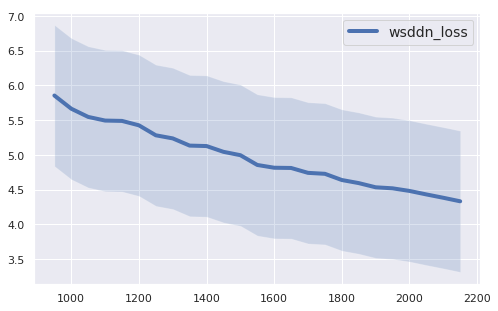

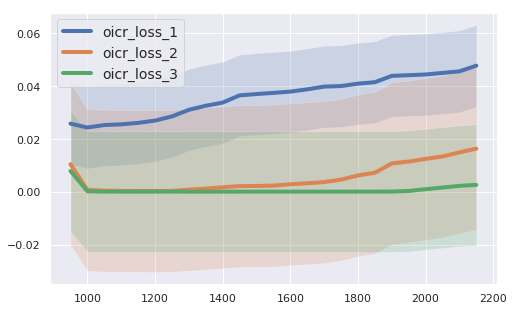

In [211]:
N= 10000
file_path = 'results/test_single/log/'
plot_reward_curve_seborn(file_path, mavg=True, mavg_v=1, n=N,
                                     target_field='midn_loss', print_header=False,
                                     txt_offset=1.0, newfig=True, conv=20)
plt.legend(['wsddn_loss'],fontsize=14)
plot_reward_curve_seborn(file_path, mavg=True, mavg_v=1, n=N,
                                     target_field='oicr_loss1', print_header=False,
                                     txt_offset=1.0, newfig=True, conv=20)

plot_reward_curve_seborn(file_path, mavg=True, mavg_v=1, n=N,
                                     target_field='oicr_loss2', print_header=False,
                                     txt_offset=1.0, newfig=False, conv=20)
plot_reward_curve_seborn(file_path, mavg=True, mavg_v=1, n=N,
                                     target_field='oicr_loss3', print_header=False,
                                     txt_offset=1.0, newfig=False, conv=20)
plt.legend(['oicr_loss_1','oicr_loss_2','oicr_loss_3'],fontsize=14)